In [1]:
# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, transpile
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *

# qiskit-ibmq-provider has been deprecated.
# Please see the Migration Guides in https://ibm.biz/provider_migration_guide for more detail.
from qiskit_ibm_runtime import QiskitRuntimeService, Sampler, Estimator, Session, Options

# Loading your IBM Quantum account(s)
service = QiskitRuntimeService(channel="ibm_quantum")

# Invoke a primitive. For more details see https://qiskit.org/documentation/partners/qiskit_ibm_runtime/tutorials.html
# result = Sampler("ibmq_qasm_simulator").run(circuits).result()

In [2]:
import qiskit
qiskit.__qiskit_version__

{'qiskit-terra': '0.25.1', 'qiskit': '0.44.1', 'qiskit-aer': '0.12.2', 'qiskit-ignis': None, 'qiskit-ibmq-provider': '0.20.2', 'qiskit-nature': '0.6.2', 'qiskit-finance': None, 'qiskit-optimization': '0.5.0', 'qiskit-machine-learning': '0.6.1'}

In [3]:
#initialization
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

# importing Qiskit
from qiskit import IBMQ, BasicAer
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, execute
from qiskit.compiler import transpile
from qiskit.tools.monitor import job_monitor

# import basic plot tools
from qiskit.tools.visualization import plot_histogram

In [4]:
# Load our saved IBMQ accounts.
IBMQ.load_account()

/tmp/ipykernel_175/4234654629.py:2: DeprecationWarning: The qiskit.IBMQ entrypoint and the qiskit-ibmq-provider package (accessible from 'qiskit.providers.ibmq`) are deprecated and will be removed in a future release. Instead you should use the qiskit-ibm-provider package which is accessible from 'qiskit_ibm_provider'. You can install it with 'pip install qiskit_ibm_provider'. Just replace 'qiskit.IBMQ' with 'qiskit_ibm_provider.IBMProvider'
  IBMQ.load_account()


<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [5]:
nQubits = 14 # number of physical qubits
a = 101      # the hidden integer whose bitstring is 1100101

# make sure that a can be represented with nQubits
a = a % 2**(nQubits)

In [7]:
# Creating registers
# qubits for querying the oracle and finding the hidden integer
qr = QuantumRegister(nQubits)
# for recording the measurement on qr
cr = ClassicalRegister(nQubits)

circuitName = "BernsteinVazirani"
bvCircuit = QuantumCircuit(qr, cr)

# Apply Hadamard gates before querying the oracle
for i in range(nQubits):
    bvCircuit.h(qr[i])
    
# Apply barrier so that it is not optimized by the compiler
bvCircuit.barrier()

# Apply the inner-product oracle
for i in range(nQubits):
    if (a & (1 << i)):
        bvCircuit.z(qr[i])
    else:
        bvCircuit.id(qr[i])
        
# Apply barrier 
bvCircuit.barrier()

#Apply Hadamard gates after querying the oracle
for i in range(nQubits):
    bvCircuit.h(qr[i])
    
# Measurement
bvCircuit.barrier(qr)
bvCircuit.measure(qr, cr)

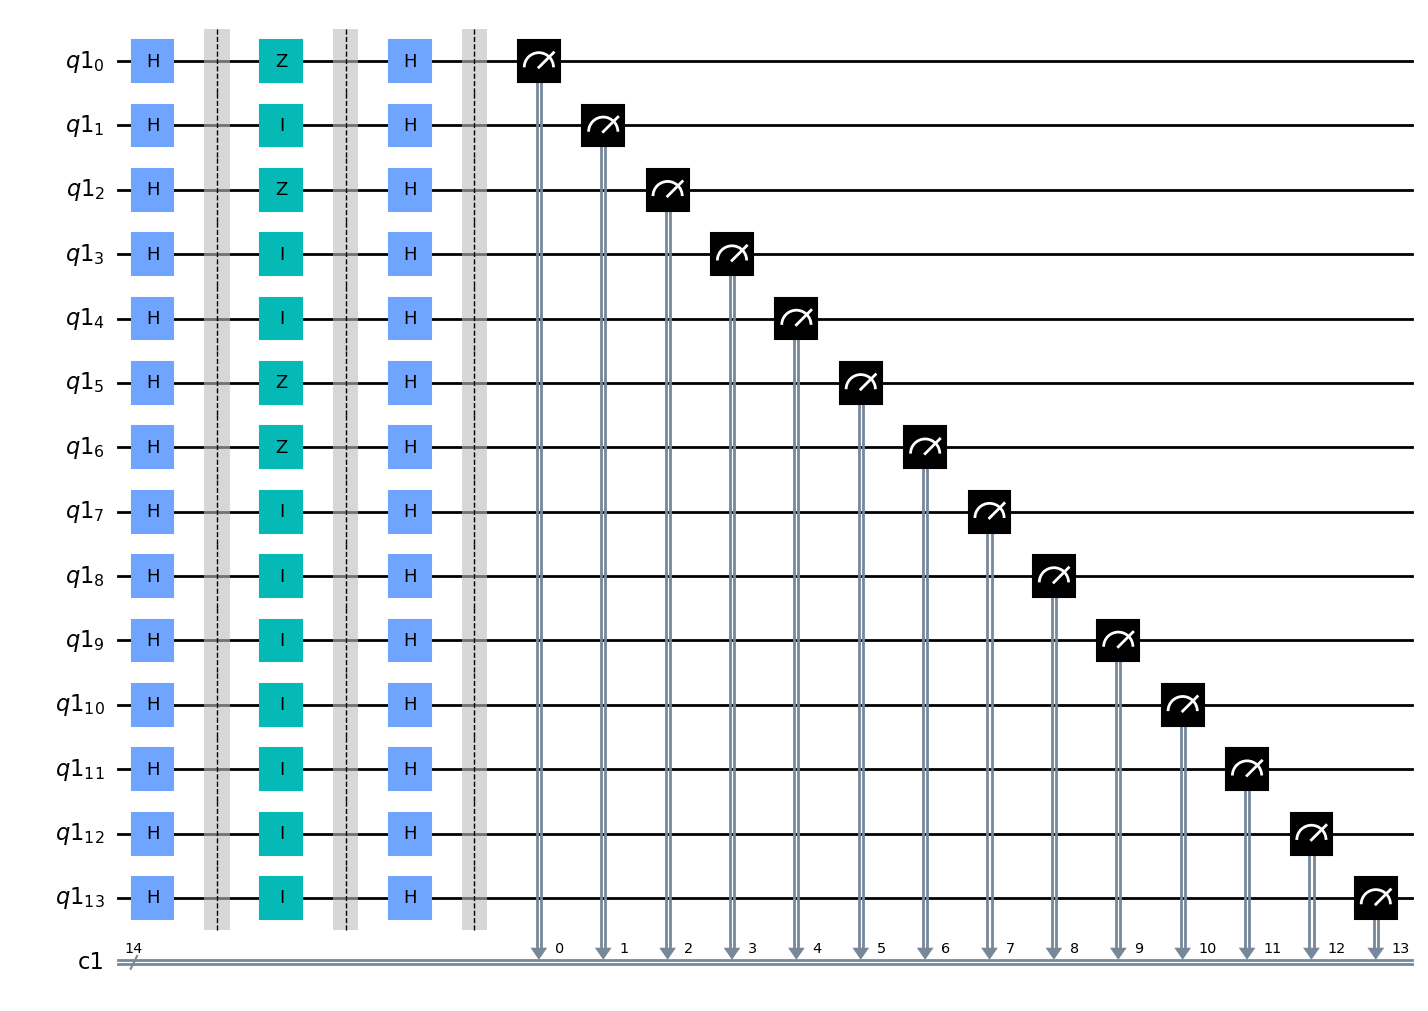

In [8]:
bvCircuit.draw(output='mpl')

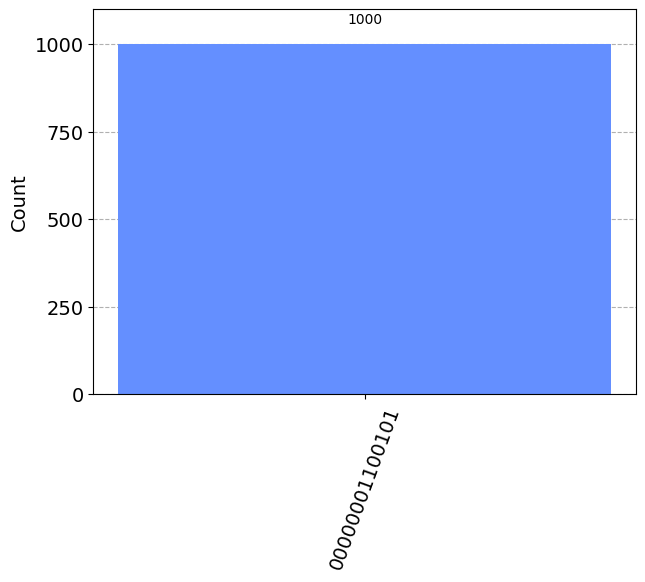

In [9]:
# use local simulator
backend = BasicAer.get_backend('qasm_simulator')
shots = 1000
results = execute(bvCircuit, backend=backend, shots=shots).result()
answer = results.get_counts()
plot_histogram(answer)